In [346]:
import os

import matplotlib.pyplot as plt
import numpy
import scipy.signal
import ipywidgets as widgets
import pandas

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py", "thinkdsp.py")

from thinkdsp import decorate, SquareSignal, Wave, zero_pad, TriangleSignal, SawtoothSignal, CubicSignal
from ipywidgets import interact

### Упражнение 9.1
Заменим периодический пилообразный сигнал на
непериодические данные Facebook

Получим wave

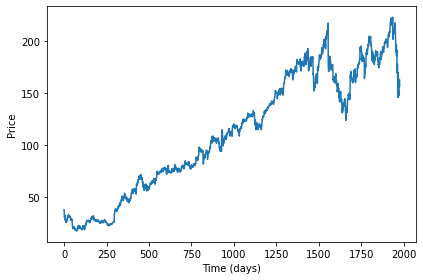

In [347]:
df = pandas.read_csv('resources/task1_FB_2.csv', header=0, parse_dates=[0])
ys = df['Close']
in_wave = Wave(ys, framerate=1)
in_wave.plot()
decorate(xlabel='Time (days)', ylabel='Price')

Получим спектр

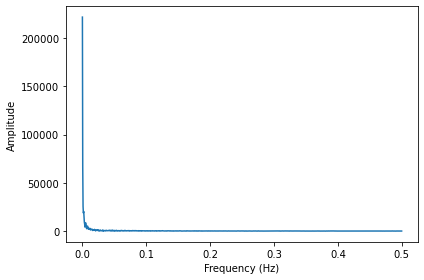

In [348]:
in_spectrum = in_wave.make_spectrum()
in_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')


Рассчитаем выходной wave

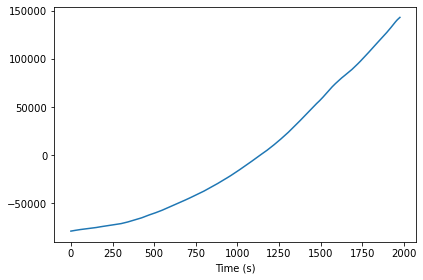

In [349]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
decorate(xlabel='Time (s)')

Получим спектр выходного wave

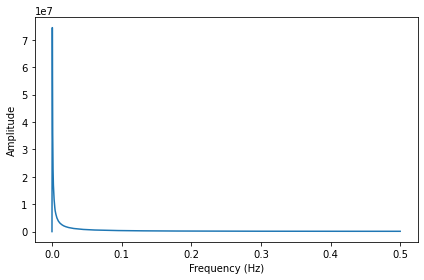

In [350]:
out_spectrum = out_wave.make_spectrum()
out_spectrum.plot()
decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

Получим отношение между входными и выходными данными

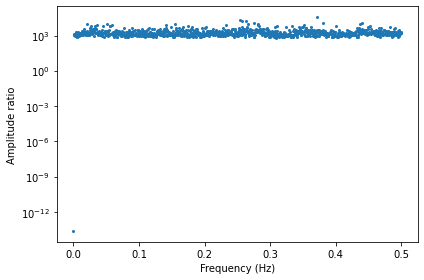

In [351]:
sum(in_spectrum.amps < 1), len(in_spectrum)
ratio_spectrum = out_spectrum.ratio(in_spectrum, thresh=1)
ratio_spectrum.plot(marker='.', ms=4, ls='')

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

Вычисляем фильтр различий

In [352]:
diff_window = numpy.array([1.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

Вычисляем фильтр cumsum, инвертируя фильтр diff

In [353]:
cumsum_filter = diff_filter.copy()
cumsum_filter.hs[1:] = 1 / cumsum_filter.hs[1:]
cumsum_filter.hs[0] = numpy.inf

Вычисляем интеграционный фильтр

In [354]:
PI2 = numpy.pi * 2
integ_filter = cumsum_filter.copy()
integ_filter.hs[1:] = integ_filter.framerate / (PI2 * 1j * integ_filter.fs[1:])
integ_filter.hs[0] = numpy.inf

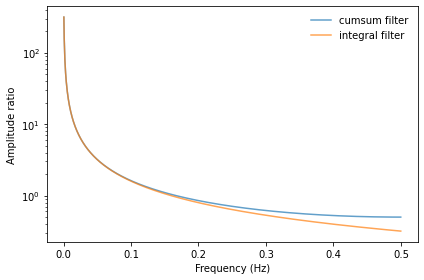

In [355]:
cumsum_filter.plot(label='cumsum filter', alpha=0.7)
integ_filter.plot(label='integral filter', alpha=0.7)

decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')


Сравним вычисленные отношения с фильтром

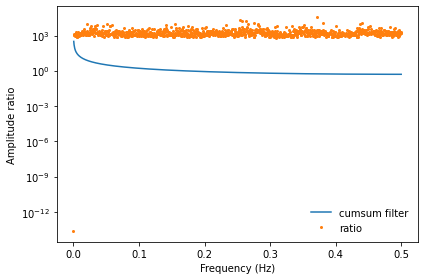

In [356]:
cumsum_filter.plot(label='cumsum filter')
ratio_spectrum.plot(label='ratio', marker='.', ms=4, ls='')
decorate(xlabel='Frequency (Hz)',
         ylabel='Amplitude ratio',
         yscale='log')

Вычислим выходной wave, используя теорему свертки и сравним результаты

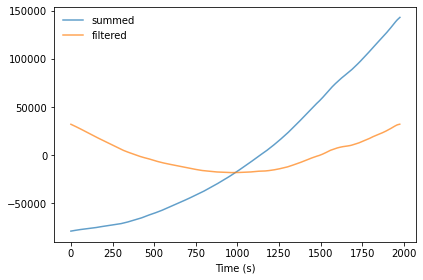

In [357]:
len(in_spectrum), len(cumsum_filter)
out_wave.plot(label='summed', alpha=0.7)

cumsum_filter.hs[0] = 0
out_wave2 = (in_spectrum * cumsum_filter).make_wave()
out_wave2.plot(label='filtered', alpha=0.7)

decorate(xlabel='Time (s)')

### Упражнение 9.2
Влияние `diff` и `differentiate` на сигнал.

Создание треугольного сигнала

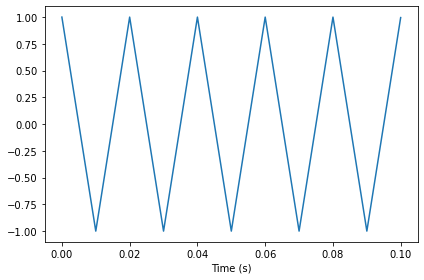

In [358]:
in_wave = TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')

Применение `diff` к сигналу

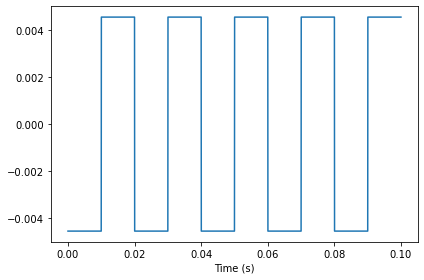

In [359]:
out_wave = in_wave.diff()
out_wave.plot()
decorate(xlabel='Time (s)')

Применение `differentiate` к сигналу

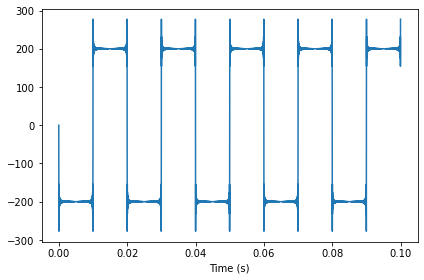

In [360]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')


### Упражнение 9.3
Влияние `cumsum` и `integrate` на сигнал.

Создание прямоугольного сигнала

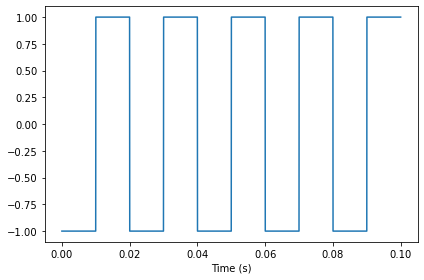

In [361]:
in_wave = SquareSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')


Применение `cumsum` к сигналу

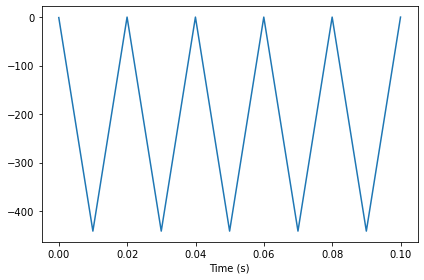

In [362]:
out_wave = in_wave.cumsum()
out_wave.plot()
decorate(xlabel='Time (s)')

Применение `integrate` к сигналу

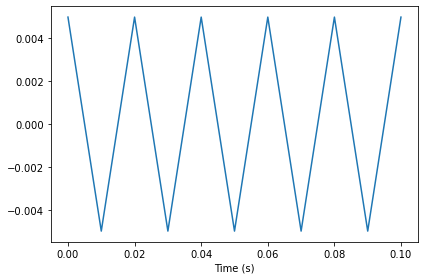

In [363]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Уравновешивание сигналов

0.0045351473922902175

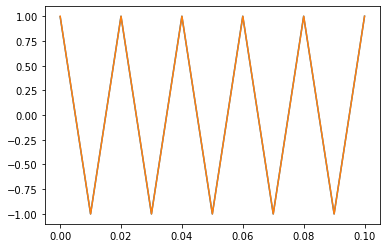

In [364]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()
out_wave.max_diff(out_wave2)


### Упражнение 9.4
Влияние двойного интегрирования

Создание пилообразного сигнала

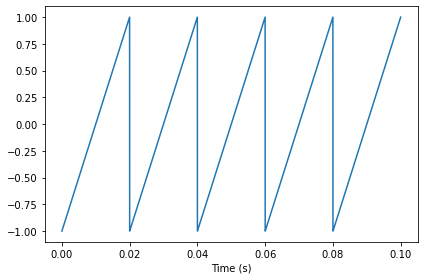

In [365]:
in_wave = SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44100)
in_wave.plot()
decorate(xlabel='Time (s)')


Применение `integrate` первый раз

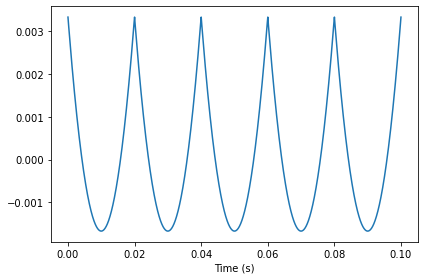

In [366]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave = spectrum.make_wave()
out_wave.plot()
decorate(xlabel='Time (s)')

Применение `integrate` второй раз

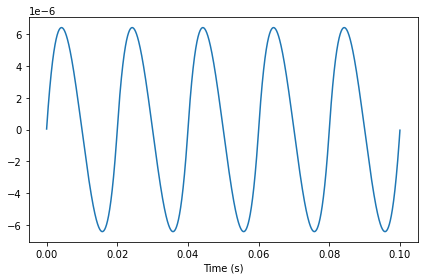

In [367]:
spectrum2 = spectrum.integrate()
spectrum2.hs[0] = 0
out_wave2 = spectrum2.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')

Оставшиеся частоты

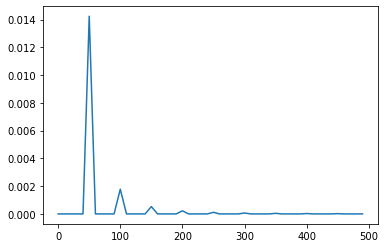

In [368]:
out_wave2.make_spectrum().plot(high=500)


### Упражнение 9.5
Влияние второй разности и второй производной

Создание кубического сигнала

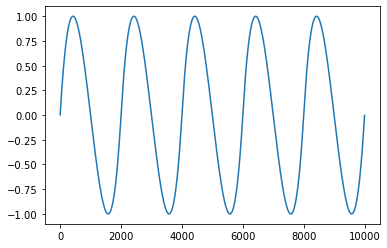

In [369]:
in_wave = CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Применение `diff` дважды

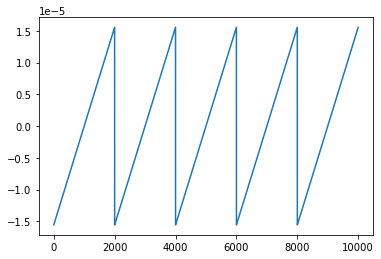

In [370]:
out_wave = in_wave.diff().diff()
out_wave.plot()


Применение `differentiate` дважды

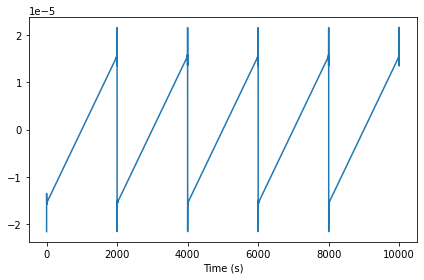

In [371]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
decorate(xlabel='Time (s)')



Вычисление фильтра второй разности

In [372]:
diff_window = numpy.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(in_wave))
diff_wave = Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()

Вычисление фильтра второй производной

In [373]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2


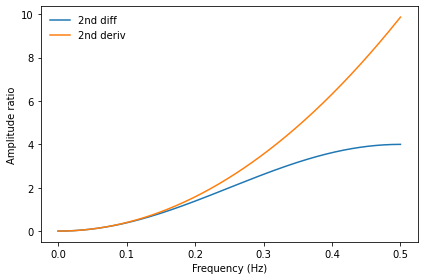

In [374]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')